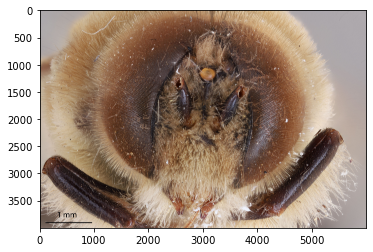

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
img = cv2.imread("bee1.jpg")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Display the original and segmented images
plt.imshow(img_rgb)
plt.show()

7218.587661623955
196794.10097575188
2


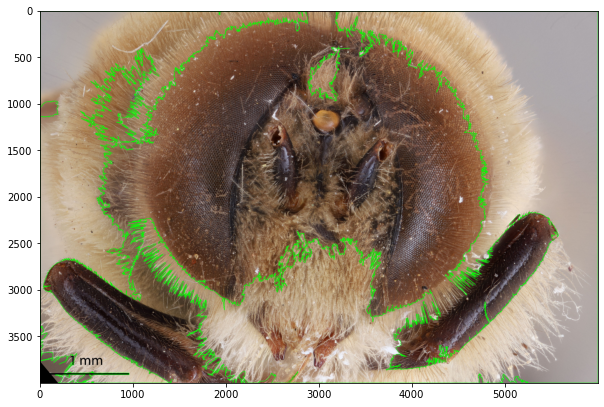

In [27]:
# Read the image
img = cv2.imread("bee1.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply thresholding to the image
_,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY)

# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

area_threshold = 90000

filtered_contours = []

# # Get the total perimeter of the image
# total_perimeter = (img.shape[0] + img.shape[1]) * 2
# print(total_perimeter)


# Iterate through the contours
for cnt in contours:
 
    area = cv2.contourArea(cnt)
    #x_min, y_min, width, height = cv2.boundingRect(cnt)
    if area > area_threshold:
        perimeter = cv2.arcLength(cnt, True)
        print(perimeter)
        filtered_contours.append(cnt)
   
print(len(filtered_contours))

cv2.drawContours(img, filtered_contours, -1, (0,255,0), 3)

# Compute the convex hull of the contour
hull = cv2.convexHull(filtered_contours[-1])
# Create a white image
mask = np.ones_like(img)*255
# Fill the area outside the convex hull with black pixels
cv2.fillPoly(mask, [hull], (0, 0, 0))
# Invert the mask
mask = cv2.bitwise_not(mask)
# Apply the mask to the original image
result = cv2.bitwise_and(img, mask)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(result)
# plt.imshow(img)
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()

### Automated Detection of seed points 
Here, we used cv2.SimpleBlobDetector in opencv

In [28]:
import cv2
img = cv2.imread("bee1.jpg")

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Set up the blob detector
params = cv2.SimpleBlobDetector_Params()
detector = cv2.SimpleBlobDetector_create(params)

# Detect blobs in the image
keypoints = detector.detect(gray)

# Extract the coordinates of the blobs and use them as seed points
seed_points = np.array([[int(kp.pt[0]), int(kp.pt[1])] for kp in keypoints])

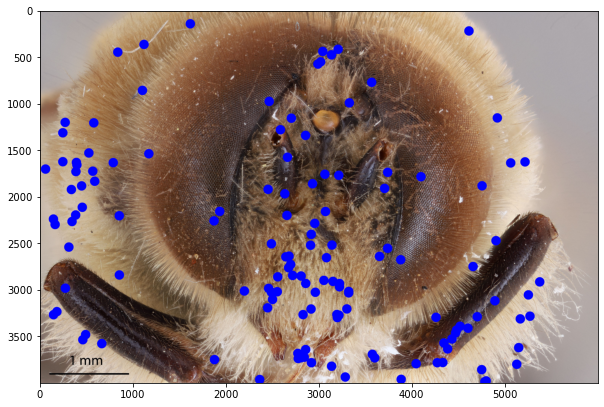

In [5]:
for point in seed_points:
    color = (255, 0, 0)
    thickness = 100
    cv2.circle(img, point, 1, color, thickness)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

automated_points = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(automated_points)
plt.show()

## Manually choosing seed points

One of the advantages of seed-based segmentation is that it allows for user interaction, allowing the user to refine the results of the segmentation by specifying additional seed points or adjusting the criteria for determining similarity.

In [32]:
img1 = cv2.imread("bee1.jpg")

cv2.namedWindow("Image", cv2.WINDOW_NORMAL)
cv2.imshow("Image", img1)

# Initialize an empty list to store the seed points
seed_points = []

# Define a callback function to handle mouse events
def on_mouse(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONUP:
        seed_points.append([x, y])
        cv2.circle(img1, (x, y), 3, (0, 255, 0), -1)
        cv2.imshow("Image", img1)

# Set the callback function for the window
cv2.setMouseCallback("Image", on_mouse)

# Wait for the user to select the seed points
while True:
    key = cv2.waitKey(1) & 0xFF
    if key == ord("q") or len(seed_points) >= 20:
        break

# Convert the list of seed points to a numpy array
seed_points = np.array(seed_points)

# Destroy the window
cv2.destroyAllWindows()

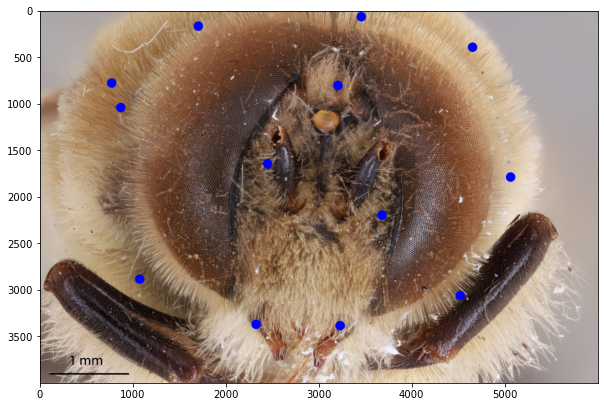

In [33]:
for point in seed_points:
    color = (255, 0, 0)
    thickness = 100
    cv2.circle(img1, point, 1, color, thickness)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

selected_points = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(selected_points)
plt.show()

## Active Contour 

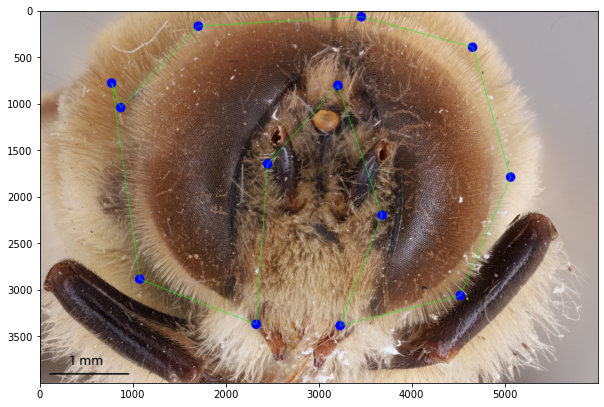

In [34]:

img_contour = cv2.polylines(img1, [seed_points], isClosed=True, color=(0, 255, 0), thickness=3)
# Apply a Gaussian filter to the image
img_contour = cv2.GaussianBlur(img_contour, (7, 7), 0)
img_contour = cv2.cvtColor(img_contour, cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.imshow(img_contour)
plt.show()

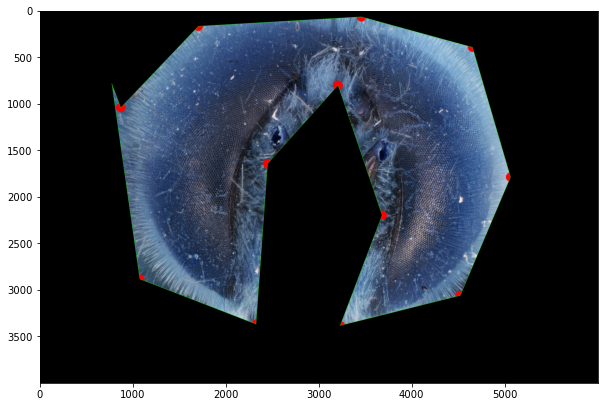

In [35]:
# Create a black mask with the same size as the image
mask = np.zeros(img_contour.shape[:2], dtype=np.uint8)
cv2.fillPoly(mask, [seed_points], (255, 255, 255))
masked_img1 = cv2.bitwise_and(img_contour, img_contour, mask=mask)
masked_img1 = cv2.cvtColor(masked_img1, cv2.COLOR_BGR2RGB)


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)
plt.imshow(masked_img1)
plt.show()

## Active Contour Algorithm 

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import color, data, segmentation, filters, future
from skimage.draw import polygon

In [37]:
rr, cc = polygon(seed_points[:, 0], seed_points[:, 1], shape=img.shape)

In [39]:
from skimage.filters import gaussian
sna = segmentation.active_contour(gaussian(img1, 3, preserve_range=False), seed_points, alpha=0.015, beta=40, gamma=0.0001)

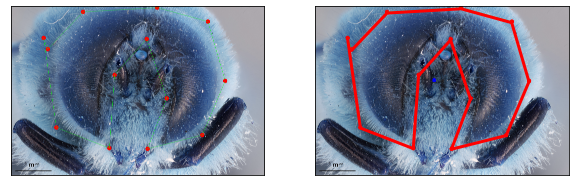

In [41]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax0.imshow(img1, cmap='gray')
ax1.imshow(img1, cmap='gray')
ax1.plot(seed_points[:, 0], seed_points[:, 1], 'r', lw=3)
ax1.plot(sna[:, 0], sna[:, 1], '-b', lw=3)
ax1.set_xticks([]), ax1.set_yticks([])
plt.show()

### Try different optimization method
Current training takes us above 8 minutes, which may be too long for a image segmentation task. Therefore, we want to try different optimization method to minimize an energy function. The original optimization method is gradient descent. 

In [ ]:
from scipy.optimize import minimize

def energy_function(snake):
    # Define the energy function to be minimized
    # ...

# Initialize the active contour model and fit to the image
result = minimize(energy_function, init_polygon, method='BFGS', options={'gtol': 1e-6})
sna = result.x